# 2D Case

In [1]:
from core.runner import Runner
import tensorflow as tf

grid_dim = 2
grid_length = 8

runner = Runner(
    grid_dimension=grid_dim, grid_length=grid_length,
    main_layer_hidden_nodes=[30, 20],
    branch1_hidden_nodes=[10],
    branch2_hidden_nodes=[10],
    exploration_rate=0.1,
    learning_rate=0.0005
)

2022-12-06 13:51:45.940826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import time

batch_size = tf.constant(500)
n_iterations = tf.constant(int(2e4))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

Iteration: 0 Average Loss: 10.124404
Iteration: 1000 Average Loss: 3.47235131
Iteration: 2000 Average Loss: 2.2052424
Iteration: 3000 Average Loss: 1.37348437
Iteration: 4000 Average Loss: 0.746509254
Iteration: 5000 Average Loss: 0.349196166
Iteration: 6000 Average Loss: 0.129888684
Iteration: 7000 Average Loss: 0.0310222264
Iteration: 8000 Average Loss: 0.00326276361
Iteration: 9000 Average Loss: 0.000245821895
Iteration: 10000 Average Loss: 3.86815227e-05
Iteration: 11000 Average Loss: 1.03832126e-05
Iteration: 12000 Average Loss: 2.41063226e-05
Iteration: 13000 Average Loss: 5.5974906e-06
Iteration: 14000 Average Loss: 1.55996204e-05
Iteration: 15000 Average Loss: 6.2199756e-06
Iteration: 16000 Average Loss: 2.78794032e-05
Iteration: 17000 Average Loss: 3.21689731e-05
Iteration: 18000 Average Loss: 4.02902606e-06
Iteration: 19000 Average Loss: 5.18564866e-06
Time Elapsed: 785.7087368965149 s


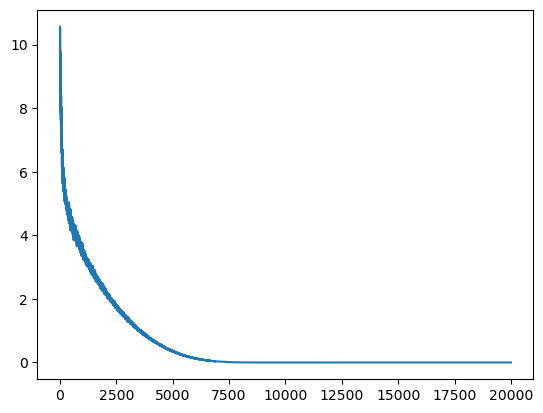

In [3]:
import matplotlib.pyplot as plt

plt.plot(ave_losses.numpy())

In [4]:
agent_distr = runner._get_normalized_agent_sample_distribution(5000)
agent_distr

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[0.0492, 0.053 , 0.    , 0.    , 0.    , 0.    , 0.0532, 0.051 ],
       [0.0562, 0.097 , 0.    , 0.0002, 0.    , 0.    , 0.1004, 0.0466],
       [0.    , 0.0002, 0.    , 0.0002, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.0002, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.0002, 0.    , 0.0002, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0522, 0.0988, 0.    , 0.0002, 0.    , 0.    , 0.0958, 0.045 ],
       [0.0482, 0.0512, 0.    , 0.    , 0.    , 0.    , 0.0488, 0.052 ]],
      dtype=float32)>

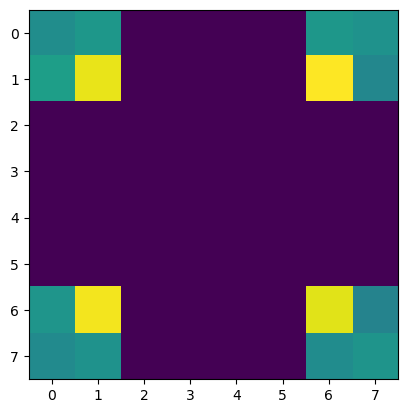

In [5]:
plt.imshow(agent_distr.numpy())

In [6]:
env_distr = runner.env.rewards / tf.math.reduce_sum(runner.env.rewards)
env_distr

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[4.9890354e-02, 4.9890354e-02, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 4.9890354e-02, 4.9890354e-02],
       [4.9890354e-02, 9.9730864e-02, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 9.9730864e-02, 4.9890354e-02],
       [4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05],
       [4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05],
       [4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05],
       [4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 4.9840513e-05, 4.9840513e-05],
       [4.9890354e-02, 9.9730864e-02, 4.9840513e-05, 4.9840513e-05,
        4.9840513e-05, 4.9840513e-05, 9.9730864e-02, 4.9890354

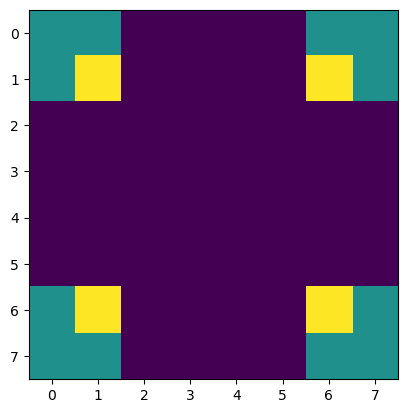

In [7]:
plt.imshow(env_distr.numpy())

In [10]:
import numpy as np

def _plot_l1_errors_per_probability_interval(agent_prob, env_prob, 
#                                              filename, 
                                             n_intervals
                                            ):
    result = agent_prob.ravel()
    expected = env_prob.ravel()
    max_expected = expected.max()
    assert max_expected != 0
    expected_pcts = expected * 100 / max_expected

    interval_edges = np.linspace(0, 100, n_intervals + 1)
    starts = interval_edges[:-1]
    ends = interval_edges[1:]

    frac_l1_errors = np.abs(result - expected) / max_expected
    errors = []
    labels = []
    for s, e in zip(starts, ends):
        inds = np.where((s < expected_pcts) & (expected_pcts <= e))
        errors_per_interval = frac_l1_errors[inds]
        if len(errors_per_interval):
            interval_label = f"{s:.2f}% < pct <= {e:.2f}%"
            errors.append(errors_per_interval)
            labels.append(interval_label)

#     print(errors)
    fig, ax = plt.subplots()
    ax.violinplot(errors)
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, rotation=15)
    ax.set_ylim(0, 1.0)
    ax.set_ylabel("Fractional L1 Errors")
    ax.set_xlabel("Percentage of max theoretical probability")
    plt.tight_layout()
#     fig.savefig(f"./plot_results/{filename}")
    return errors

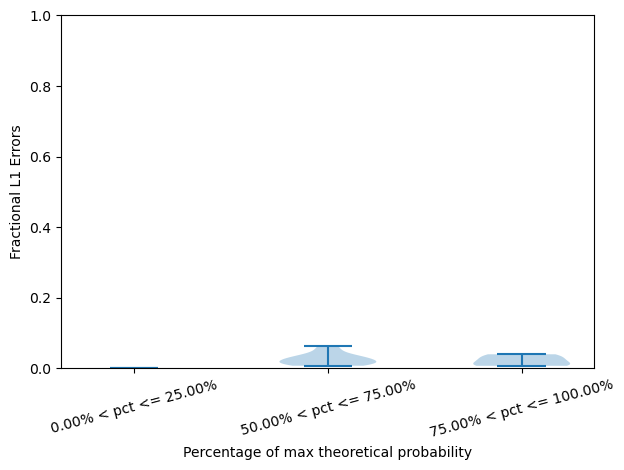

In [11]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

# 5D Case

In [12]:
from core.runner import Runner
import tensorflow as tf

grid_dim = 5
grid_length = 8

runner = Runner(
    grid_dimension=grid_dim, grid_length=grid_length,
    main_layer_hidden_nodes=[30, 20],
    branch1_hidden_nodes=[10],
    branch2_hidden_nodes=[10],
    exploration_rate=0.5,
    learning_rate=0.0005
)

In [13]:
import time

batch_size = tf.constant(500)
n_iterations = tf.constant(int(3e4))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

Iteration: 0 Average Loss: 52.7874069
Iteration: 1000 Average Loss: 13.0282497
Iteration: 2000 Average Loss: 10.2744036
Iteration: 3000 Average Loss: 7.83133
Iteration: 4000 Average Loss: 5.40545273
Iteration: 5000 Average Loss: 4.19660759
Iteration: 6000 Average Loss: 3.51626706
Iteration: 7000 Average Loss: 2.37379217
Iteration: 8000 Average Loss: 1.95429087
Iteration: 9000 Average Loss: 1.27870798
Iteration: 10000 Average Loss: 1.04805648
Iteration: 11000 Average Loss: 0.590330064
Iteration: 12000 Average Loss: 0.581985235
Iteration: 13000 Average Loss: 0.43991816
Iteration: 14000 Average Loss: 0.252281517
Iteration: 15000 Average Loss: 0.176304877
Iteration: 16000 Average Loss: 0.124539673
Iteration: 17000 Average Loss: 0.0749916509
Iteration: 18000 Average Loss: 0.0693009198
Iteration: 19000 Average Loss: 0.0329089649
Iteration: 20000 Average Loss: 0.0366628803
Iteration: 21000 Average Loss: 0.0171591528
Iteration: 22000 Average Loss: 0.0185650475
Iteration: 23000 Average Loss: 0.

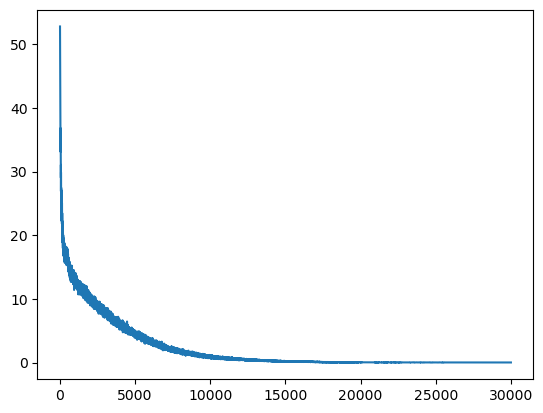

In [14]:
plt.plot(ave_losses.numpy())

In [15]:
agent_distr = runner._get_normalized_agent_sample_distribution(5000)

In [16]:
env_distr = runner.env.rewards / tf.math.reduce_sum(runner.env.rewards)

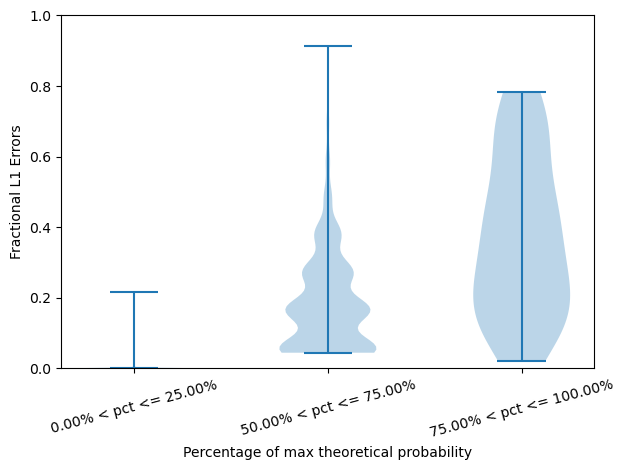

In [17]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

In [18]:
agent_distr = runner._get_normalized_agent_sample_distribution(50000)

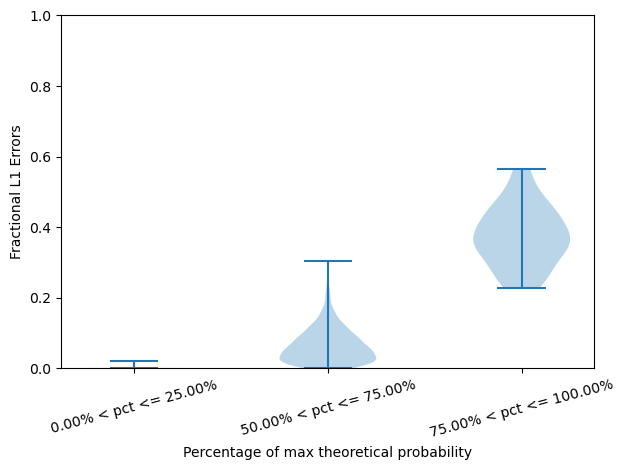

In [19]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

In [20]:
agent_distr = runner._get_normalized_agent_sample_distribution(500000)

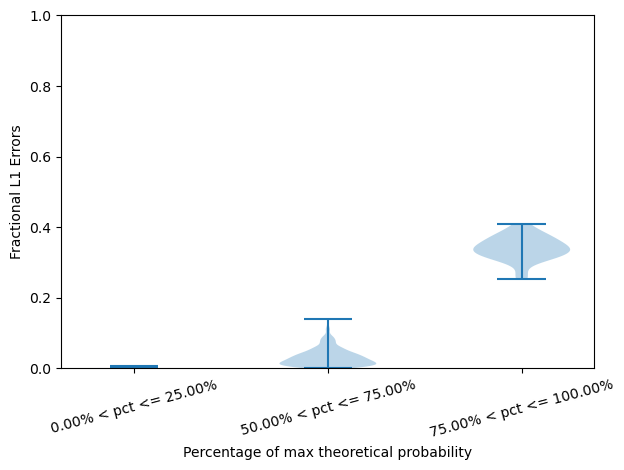

In [21]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

# Continue training

In [22]:
batch_size = tf.constant(500)
n_iterations = tf.constant(int(5e3))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

Iteration: 0 Average Loss: 0.0064731692
Iteration: 1000 Average Loss: 0.0055554104
Iteration: 2000 Average Loss: 0.00496996939
Iteration: 3000 Average Loss: 0.00425169477
Iteration: 4000 Average Loss: 0.00399064412
Time Elapsed: 546.2940108776093 s


In [23]:
n_samples = tf.constant(500000)

agent_distr = runner._get_normalized_agent_sample_distribution(n_samples)

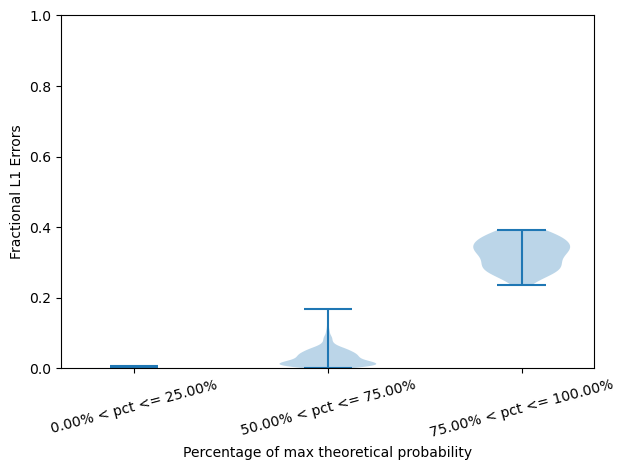

In [24]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)